O conjunto de nosso interesse pode ser acessado buscando pelos itens da seção Transporte" ou utilizando o termo "estações" na caixa de pesquisa. Para facilitar nosso trabalho, linkamos aqui diretamente a página do dataset "Estações Metrô". Nela, existem ainda diversas outras informações a respeito do conjunto, que você poderá estudar mais profundamente no futuro. Por enquanto, acessaremos o menu "APIs" e copiaremos o seguinte link:

https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

Com ele, conseguiremos baixar o arquivo Estações_Metrô.geojson

In [2]:
%matplotlib inline
import geopandas as gpd

In [3]:
metro = gpd.read_file('Transporte/Metrô/Estações_Metrô.geojson')

In [4]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


Estamos interessados na coluna "geometry", que contém os pontos onde estão localizadas as estações de metrô. Para utilizarmos esses pontos juntamente com outros dados georreferenciados, precisaremos modificar o CRS desse conjunto:

In [5]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [6]:
metro

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)
5,6,6,Irajá,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (672.041 7472.334)
6,7,7,Vicente de Carvalho,1,1.0,0.0,0,1,None,1,...,0,0,1,Transcarioca,0,None,0,None,1996,POINT (673.083 7471.645)
7,8,8,Tomaz Coelho,0,0.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1996,POINT (673.719 7470.715)
8,9,9,Engenho da Rainha,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1991,POINT (674.672 7470.100)
9,10,10,Inhauma,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1983,POINT (676.104 7469.341)


Prosseguindo, importaremos rj e geo_dados:

In [7]:
rj = gpd.read_file('Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('Mapas/RJ-DATASET/DATASET.shp')

Plotaremos, então, os três conjuntos de uma só vez, criando uma única visualização. Para isso, repetiremos o processo feito nos capítulos anteriores, passando rj como base e configurando as plotagens de acordo com as nossas necessidades: manteremos o atributo alpha=0.2 para geo_dados, por exemplo, para continuarmos enxergando a densidade das distribuições; e usaremos markersize = 50 no conjunto metro, aumentando os pontos no mapa de modo a torná-los mais visíveis.

<AxesSubplot:>

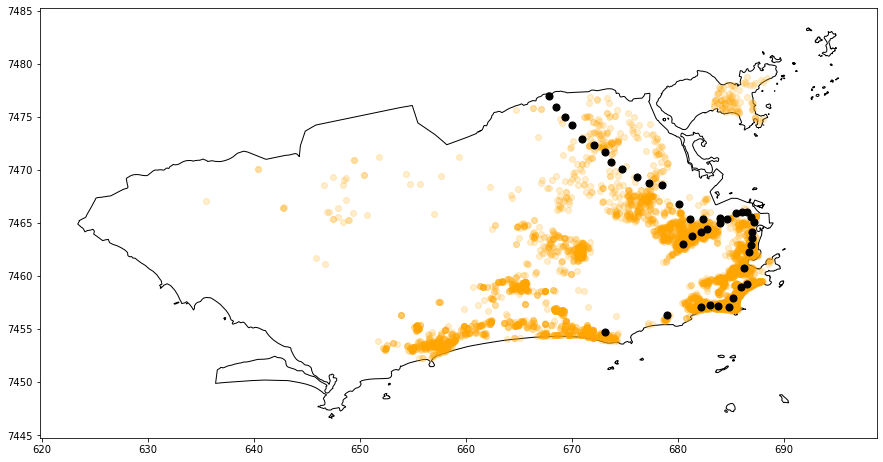

In [8]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))

geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)

Com isso, geraremos acima um mapa da cidade do Rio de Janeiro contendo os imóveis à venda (em laranja) e as estações de metrô (em preto).

A seguir, utilizaremos uma funcionalidade do GeoPandas para calcularmos a distância entre os pontos e as estações de metrô. Além disso, salvaremos em um registro quais são as estações de metrô mais próximas para cada um desses pontos.

# Calculando as distâncias

Calcularemos as distâncias em linha reta, pois o GeoPandas não possui uma funcionalidade que nos permita calcular a distância de percurso entre os pontos.

Começaremos descobrindo qual a estação de metrô mais próxima do primeiro registro do conjunto geo_dados. Para isso, teremos que calcular as distâncias entre esse ponto e cada uma das estações, para então salvarmos a menor delas. Criaremos, então, uma variável distances que receberá o retorno da função metro.distance():

In [9]:
distances = metro.distance(geo_dados.iloc[0].geometry)

O resultado é uma series com as distâncias entre geo_dados.iloc[0] e cada uma das 41 estações do conjunto metro. Com distances.min(), obteremos facilmente qual a menor delas:

In [10]:
distances

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [11]:
distances.min()

15.62293882499506

In [12]:
distances.max()

31.695780382446408

In [13]:
distances.mean()

26.799387339768035

Lembre-se que esses valores estão em quilômetros - ou seja, a menor distância é de aproximadamente 15,6km. Agora precisamos automatizar esse processo, afinal calcular essas distâncias manualmente para cada registro é muito trabalhoso. Então, em geo_dados, criaremos uma nova variável Dist_Metro, que funcionará como uma coluna.

A ela atribuiremos o retorno da função geo_dados['geometry'].apply(), para a qual passaremos uma função lambda (lambda :) criando um objeto x (fazendo referência ao registro que estamos trabalhando). Após os dois pontos, passaremos metro.distance(x) (na qual x é o valor da linha) e a função que retorna o menor valor (min()):

In [14]:
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

In [15]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159


A variável Dist_Metro será utilizada futuramente em um modelo de regressão que criaremos em outro curso aqui na plataforma, no qual estimaremos o valor de um imóvel a partir das informações nos nossos conjuntos.

Para termos uma ideia do que será feito, utilizaremos geo_dados.corr() para visualizarmos o coeficiente de correlação entre as variáveis Dist_Metro e Valor:

In [16]:
geo_dados.corr() 

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


Na tabela, é possível verificar que esse coeficiente é -0.195641. Salvaremos esse dado em uma nova variável:

In [17]:
coef = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])

In [18]:
coef

-0.19564083161686824

Esse valor nos indica que quanto maior a distância entre um imóvel e uma estação de metrô, menor será o valor desse imóvel. Isso pode ser conferido multiplicando o coef por uma progressão de valores que se referem à essa distância. Por exemplo, se a distância for de 1km, o resultado será 0.195641. Já se for 10km, ele aumentará para -1.956408316168683 - um valor maior, e que, portanto, confirma nossa suposição.

Valores positivos de coeficientes de correlação significam que os valores sendo comparados têm uma correlação positiva - ou seja, se um deles aumenta, o outro também aumenta (e vice-versa). Já valores negativos, que representam uma correlação negativa, indicam que tais valores de comportam de maneira oposta.

Para finalizarmos essa etapa, salvaremos nossas alterações com geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp'). A seguir, continuaremos trabalhando com distâncias, incluindo também outros meios de transporte (como BRT e trens). Dessa forma, tendo em vista que as estações de metrô não atendem grande parte do Rio de Janeiro, tentaremos analisar de maneira mais abrangente esse território.